# Data Analysis and Preprocessing


In [1]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [2]:

import pandas as pd


fraud_data = pd.read_csv(r'C:\Users\Naim\Fraud-Detection\data\Fraud_Data.csv')
ip_to_country_path =pd.read_csv(r'C:\Users\Naim\Fraud-Detection\data\IpAddress_to_Country.csv')


print(fraud_data.isnull().sum())



user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [3]:


from fraud_detection import clean_data

cleaned_df = clean_data(fraud_data)

print(cleaned_df.head())
print(cleaned_df.dtypes)


c:\Users\Naim\Fraud-Detection\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


  user_id         signup_time       purchase_time  purchase_value  \
0   22058 2015-02-24 22:55:49 2015-04-18 02:47:11            34.0   
1  333320 2015-06-07 20:39:50 2015-06-08 01:38:54            16.0   
2    1359 2015-01-01 18:52:44 2015-01-01 18:52:45            15.0   
3  150084 2015-04-28 21:13:25 2015-05-04 13:54:50            44.0   
4  221365 2015-07-21 07:09:52 2015-09-09 18:40:53            39.0   

       device_id source browser sex  age        ip_address class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368.79972     0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  350311387.865908     0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820.11095     1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443.91396     0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  415583117.452712     0  
user_id                   object
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value           float64
device_id                 object
source            

Summary Statistics:
              user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  
count  151112.000000  
mean        0.093646  
std         0.291336  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


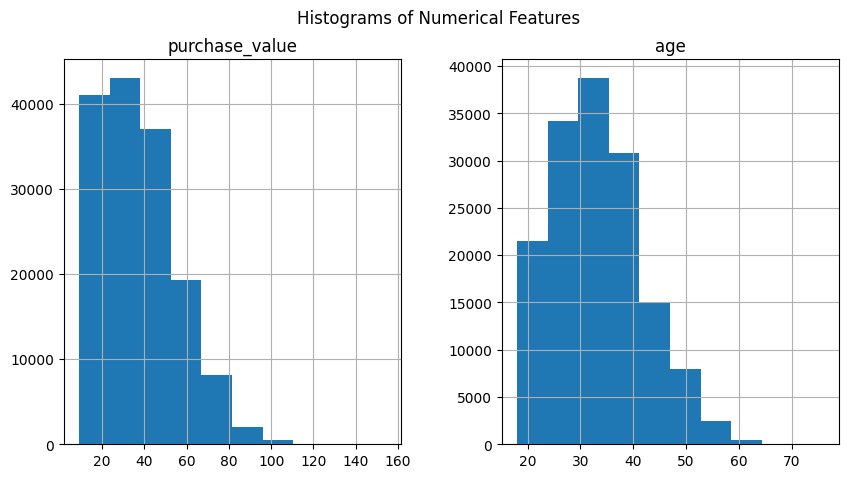

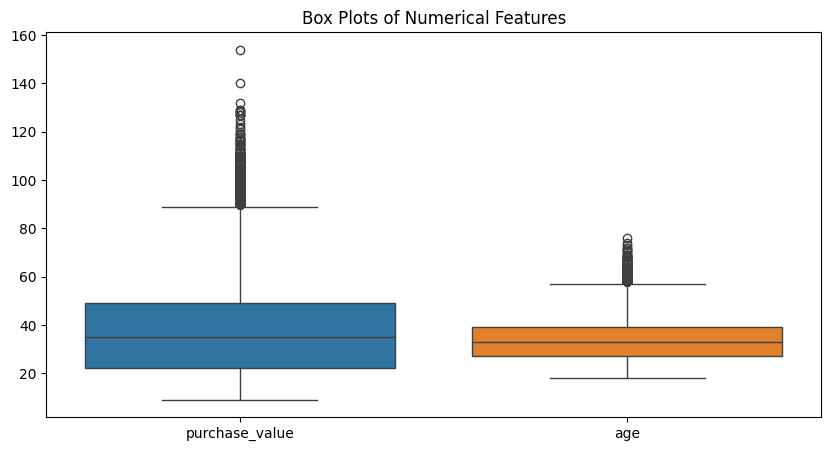

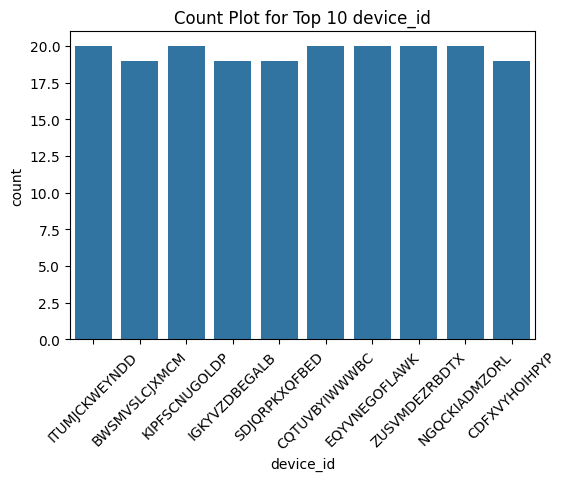

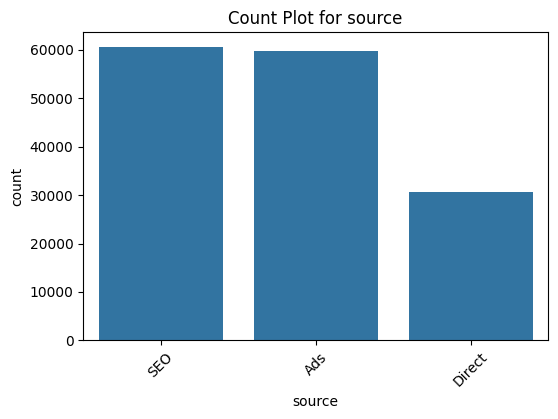

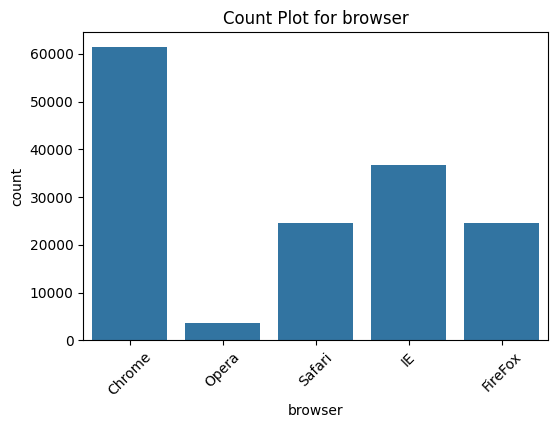

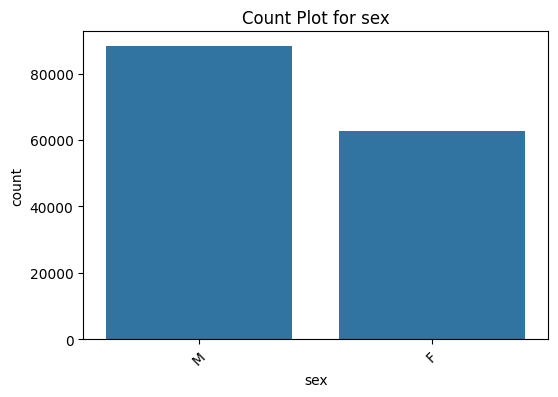

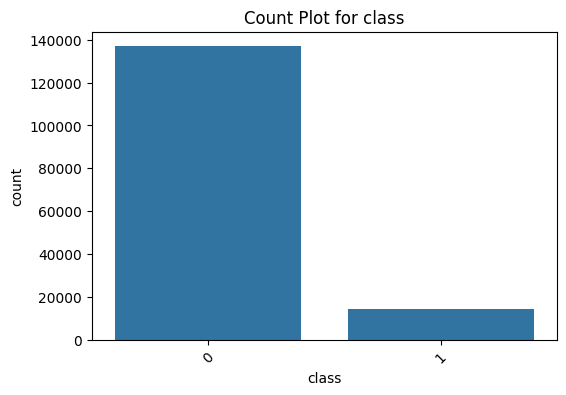

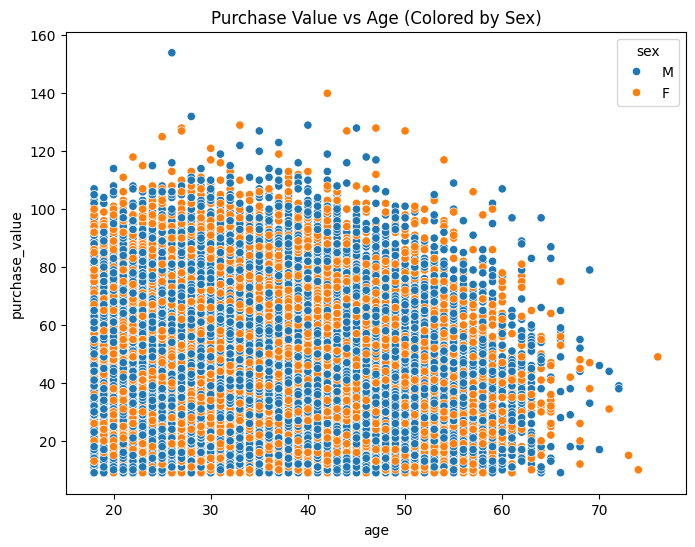

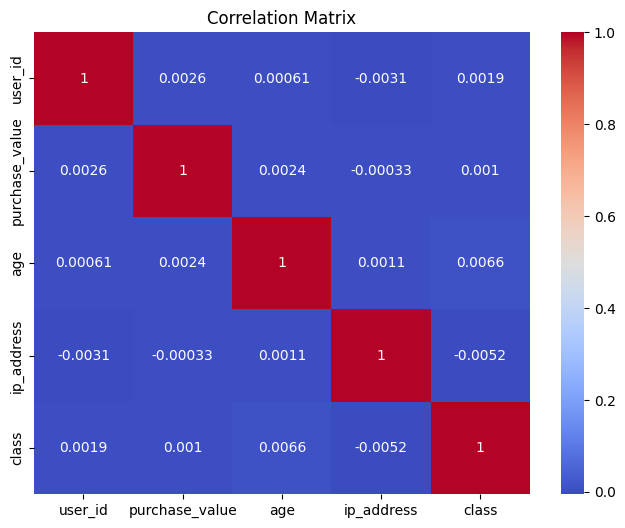

Cross Tabulation of Source vs Class:
 class       0     1
source             
Ads     54368  5513
Direct  27390  3226
SEO     55203  5412


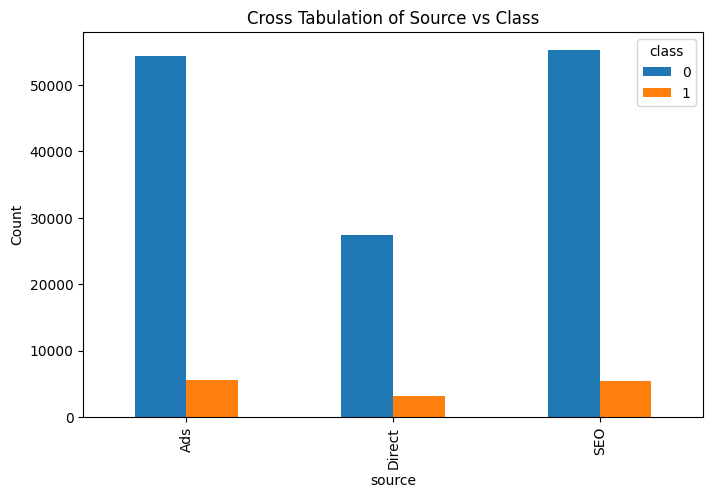

In [4]:
from fraud_detection import univariate_analysis, bivariate_analysis


numerical_columns = ['purchase_value', 'age']
categorical_columns = ['device_id', 'source', 'browser', 'sex', 'class']

# Call univariate analysis
univariate_analysis(fraud_data, numerical_columns, categorical_columns)

# Call bivariate analysis

bivariate_analysis(fraud_data)

In [5]:
# Convert the ip_address column to integers
fraud_data['ip_address_int'] = fraud_data['ip_address'].astype('int64')

# Check the converted data
print(fraud_data[['ip_address', 'ip_address_int']].head())


     ip_address  ip_address_int
0  7.327584e+08       732758368
1  3.503114e+08       350311387
2  2.621474e+09      2621473820
3  3.840542e+09      3840542443
4  4.155831e+08       415583117


In [6]:
from fraud_detection import merge_fraud_with_geolocation

# Call the function to merge the datasets
merged_data = merge_fraud_with_geolocation(fraud_data, ip_to_country_path)

print('Display the first few rows of the merged data')
print(merged_data.head())

Display the first few rows of the merged data
     user_id          signup_time        purchase_time  purchase_value  \
634   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
635   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
636   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
637    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
638   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

         device_id  source browser sex  age    ip_address  class  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30  1.677886e+07      0   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34  1.684205e+07      0   
636  LVCSXLISZHVUO     Ads      IE   M   29  1.684366e+07      0   
637  UHAUHNXXUADJE  Direct  Chrome   F   30  1.693873e+07      0   
638  XPGPMOHIDRMGE     SEO  Chrome   F   37  1.697198e+07      0   

     ip_address_int  lower_bound_ip_address  upper_bound_ip_address    country  
634        16778864

In [7]:
# Import the feature engineering functions
from fraud_detection import convert_to_datetime, transaction_frequency, transaction_velocity, extract_time_features


# Convert time columns to datetime
merged_data = convert_to_datetime(merged_data, ['signup_time', 'purchase_time'])

# Calculate transaction frequency
merged_data = transaction_frequency(merged_data)

# Calculate transaction velocity
merged_data = transaction_velocity(merged_data)

# Extract hour of day and day of week
merged_data = extract_time_features(merged_data)

# Check the resulting DataFrame with new features
print(merged_data[['user_id', 'transaction_count', 'time_since_last_transaction', 'hour_of_day', 'day_of_week']].head())

# Optionally save the enhanced dataset
merged_data.to_csv('Enhanced_Fraud_Data.csv', index=False)


c:\Users\Naim\Fraud-Detection\scripts\fraud_detection.py:195: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['time_since_last_transaction'].fillna(0, inplace=True)  # Fill NaN for first transaction with 0


     user_id  transaction_count  time_since_last_transaction  hour_of_day  \
634   247547                  1                          0.0            3   
635   220737                  1                          0.0           20   
636   390400                  1                          0.0           23   
637    69592                  1                          0.0           16   
638   174987                  1                          0.0            4   

     day_of_week  
634            6  
635            2  
636            5  
637            5  
638            1  


In [8]:

import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

fraud_dataa = pd.read_csv(r'C:\Users\Naim\Fraud-Detection\notebooks\Enhanced_Fraud_Data.csv')
creditcard =pd.read_csv(r'C:\Users\Naim\Fraud-Detection\data\creditcard.csv')

In [9]:

from fraud_detection import label_encode_features, one_hot_encode_features

# List of categorical columns to encode
categorical_columns = ['source', 'browser', 'sex']

# Option 1: Label encode the features
fraud_data1, label_encoders = label_encode_features(fraud_dataa, categorical_columns)

# Option 2: One-hot encode the features
fraud_data_one_hot = one_hot_encode_features(fraud_dataa, categorical_columns)
# Convert datetime to numeric features
fraud_data1['signup_time'] = pd.to_datetime(fraud_dataa['signup_time'])
fraud_data1['purchase_time'] = pd.to_datetime(fraud_dataa['purchase_time'])

# Create a new feature for the time difference between signup and purchase (in seconds)
fraud_data1['time_diff'] = (fraud_dataa['purchase_time'] - fraud_dataa['signup_time']).dt.total_seconds()

# Check the transformed DataFrame
print(fraud_data1.head())           # For label encoded data
print(fraud_data_one_hot.head())   # For one-hot encoded data


   user_id         signup_time       purchase_time  purchase_value  \
0   247547 2015-06-28 03:00:34 2015-08-09 03:57:29              47   
1   220737 2015-01-28 14:21:11 2015-02-11 20:28:28              15   
2   390400 2015-03-19 20:49:09 2015-04-11 23:41:23              44   
3    69592 2015-02-24 06:11:57 2015-05-23 16:40:14              55   
4   174987 2015-07-07 12:58:11 2015-11-03 04:04:30              51   

       device_id  source  browser  sex  age    ip_address  class  \
0  KIXYSVCHIPQBR       2        4    0   30  1.677886e+07      0   
1  PKYOWQKWGJNJI       2        0    0   34  1.684205e+07      0   
2  LVCSXLISZHVUO       0        2    1   29  1.684366e+07      0   
3  UHAUHNXXUADJE       1        0    0   30  1.693873e+07      0   
4  XPGPMOHIDRMGE       2        0    0   37  1.697198e+07      0   

   ip_address_int  lower_bound_ip_address  upper_bound_ip_address    country  \
0        16778864              16778240.0              16779263.0  Australia   
1        1

In [10]:
# Import the normalization and standardization functions
from fraud_detection import normalize_features, standardize_features

# List of numerical columns to normalize or standardize
numerical_columns = ['purchase_value', 'age', 'transaction_count', 'time_since_last_transaction']

# Normalize the features (Min-Max Scaling)
fraud_data_normalized = normalize_features(fraud_data1, numerical_columns)

# Or, alternatively, Standardize the features (Z-score Scaling)
fraud_data_standardized = standardize_features(fraud_data1, numerical_columns)

# Check the normalized or standardized DataFrame
print(fraud_data_normalized[numerical_columns].head())
print(fraud_data_standardized[numerical_columns].head())

   purchase_value       age  transaction_count  time_since_last_transaction
0        0.549607 -0.363124                0.0                          0.0
1       -1.197335  0.101168                0.0                          0.0
2        0.385831 -0.479197                0.0                          0.0
3        0.986342 -0.363124                0.0                          0.0
4        0.767974  0.449387                0.0                          0.0
   purchase_value       age  transaction_count  time_since_last_transaction
0        0.549607 -0.363124                0.0                          0.0
1       -1.197335  0.101168                0.0                          0.0
2        0.385831 -0.479197                0.0                          0.0
3        0.986342 -0.363124                0.0                          0.0
4        0.767974  0.449387                0.0                          0.0


In [11]:
fraud_data_standardized[fraud_data_standardized['class']==1].count()

user_id                        12268
signup_time                    12268
purchase_time                  12268
purchase_value                 12268
device_id                      12268
source                         12268
browser                        12268
sex                            12268
age                            12268
ip_address                     12268
class                          12268
ip_address_int                 12268
lower_bound_ip_address         12268
upper_bound_ip_address         12268
country                        12268
transaction_count              12268
time_since_last_transaction    12268
hour_of_day                    12268
day_of_week                    12268
time_diff                      12268
dtype: int64

# Task 2 - Model Building and Training 

In [12]:
# Drop the original datetime columns
fraud_data_standardized = fraud_data_standardized.drop(columns=['signup_time', 'purchase_time'])


In [13]:
print(creditcard.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [14]:
# Fraud_Data.csv: Feature and Target Separation
X_fraud = fraud_data_standardized.drop(columns=['class'])  # Features
y_fraud = fraud_data_standardized['class']                 # Target

# creditcard.csv: Feature and Target Separation
X_creditcard = creditcard.drop(columns=['Class'])  # Features
y_creditcard = creditcard['Class']                 # Target


In [15]:
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
le_device = LabelEncoder()
le_country = LabelEncoder()
X_fraud['device_id'] = le_device.fit_transform(X_fraud['device_id'])
X_fraud['country'] = le_country.fit_transform(X_fraud['country'])

# Split Fraud_Data.csv into training and testing sets (80% training, 20% testing)
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_fraud, y_fraud, test_size=0.2, random_state=42)

# Split creditcard.csv into training and testing sets (80% training, 20% testing)
X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test = train_test_split(X_creditcard, y_creditcard, test_size=0.2, random_state=42)


# Training models for fraud-data datasets.


In [16]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Standardize the features
scaler = StandardScaler()
X_fraud_train_scaled = scaler.fit_transform(X_fraud_train)
X_fraud_test_scaled = scaler.transform(X_fraud_test)
feature_names = X_fraud_train.columns
# Convert scaled data to DataFrame with consistent feature names
X_fraud_train_scaled = pd.DataFrame(X_fraud_train_scaled, columns=feature_names)
X_fraud_test_scaled = pd.DataFrame(X_fraud_test_scaled, columns=feature_names)

# Re-train logistic regression with the current 17 features
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg.fit(X_fraud_train_scaled, y_fraud_train)

# Predictions and evaluation
y_pred_log_reg = log_reg.predict(X_fraud_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_fraud_test, y_pred_log_reg)
precision = precision_score(y_fraud_test, y_pred_log_reg, average=None)
recall = recall_score(y_fraud_test, y_pred_log_reg, average=None)
f1 = f1_score(y_fraud_test, y_pred_log_reg, average=None)

print(f"Accuracy: {accuracy}")
print(f"Precision (for class 0 and 1): {precision}")
print(f"Recall (for class 0 and 1): {recall}")
print(f"F1-Score (for class 0 and 1): {f1}")

# Now proceed with SHAP using the 17-feature model



Accuracy: 0.6504452187379016
Precision (for class 0 and 1): [0.95417245 0.16870244]
Recall (for class 0 and 1): [0.64545882 0.69888013]
F1-Score (for class 0 and 1): [0.77002623 0.27179611]


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with class_weight='balanced'
dtree = DecisionTreeClassifier(class_weight='balanced')
dtree.fit(X_fraud_train_scaled, y_fraud_train)

# Predictions
y_pred_dtree = dtree.predict(X_fraud_test_scaled)

# Evaluate the Decision Tree model
accuracy = accuracy_score(y_fraud_test, y_pred_dtree)
precision = precision_score(y_fraud_test, y_pred_dtree,average=None)
recall = recall_score(y_fraud_test, y_pred_dtree,average=None)
f1 = f1_score(y_fraud_test, y_pred_dtree,average=None)

print(f"Decision Tree Accuracy: {accuracy}")
print(f"Precision(for class 0 and 1): {precision}")
print(f"Recall(for class 0 and 1): {recall}")
print(f"F1-Score(for class 0 and 1): {f1}")


Decision Tree Accuracy: 0.9125822686798296
Precision(for class 0 and 1): [0.95501656 0.52968568]
Recall(for class 0 and 1): [0.94824715 0.56615512]
F1-Score(for class 0 and 1): [0.95161981 0.54731355]


In [18]:
# Get the number of features
num_features = X_fraud_train_scaled.shape[1]
print(f"The Decision Tree model was trained with {num_features} features.")


The Decision Tree model was trained with 17 features.


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_fraud_train_scaled, y_fraud_train)

# Predictions
y_pred_rf = rf.predict(X_fraud_test_scaled)

# Evaluate the Random Forest model
accuracy = accuracy_score(y_fraud_test, y_pred_rf)
precision = precision_score(y_fraud_test, y_pred_rf,average=None)
recall = recall_score(y_fraud_test, y_pred_rf,average=None)
f1 = f1_score(y_fraud_test, y_pred_rf,average=None)

print(f"Random Forest Accuracy: {accuracy}")
print(f"Precision(for class 0 and 1): {precision}")
print(f"Recall(for class 0 and 1): {recall}")
print(f"F1-Score(for class 0 and 1): {f1}")


Random Forest Accuracy: 0.9569879984514131
Precision(for class 0 and 1): [0.95470852 1.        ]
Recall(for class 0 and 1): [1.         0.53919535]
F1-Score(for class 0 and 1): [0.97682955 0.70061978]


In [40]:
import joblib

# Save the Random Forest model as 'fraud_model.pkl'
joblib.dump(rf, 'fraud_model.pkl')
print("Saved the Random Forest model as 'fraud_model.pkl'")


Saved the Random Forest model as 'fraud_model.pkl'


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_fraud_train_scaled, y_fraud_train)

# Predictions
y_pred_gb = gb.predict(X_fraud_test_scaled)

# Evaluate the Gradient Boosting model
accuracy = accuracy_score(y_fraud_test, y_pred_gb)
precision = precision_score(y_fraud_test, y_pred_gb,average=None)
recall = recall_score(y_fraud_test, y_pred_gb,average=None)
f1 = f1_score(y_fraud_test, y_pred_gb,average=None)

print(f"Gradient Boosting Accuracy: {accuracy}")
print(f"Precision(for class 0 and 1): {precision}")
print(f"Recall(for class 0 and 1): {recall}")
print(f"F1-Score(for class 0 and 1): {f1}")


Gradient Boosting Accuracy: 0.9570267131242741
Precision(for class 0 and 1): [0.95474744 1.        ]
Recall(for class 0 and 1): [1.         0.53961012]
F1-Score(for class 0 and 1): [0.97684992 0.70096983]


In [21]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP
mlp = MLPClassifier(max_iter=500)
mlp.fit(X_fraud_train_scaled, y_fraud_train)

# Predictions
y_pred_mlp = mlp.predict(X_fraud_test_scaled)

# Evaluate the MLP model
accuracy = accuracy_score(y_fraud_test, y_pred_mlp)
precision = precision_score(y_fraud_test, y_pred_mlp,average=None)
recall = recall_score(y_fraud_test, y_pred_mlp,average=None)
f1 = f1_score(y_fraud_test, y_pred_mlp,average=None)

print(f"MLP Accuracy: {accuracy}")
print(f"Precision(for class 0 and 1): {precision}")
print(f"Recall(for class 0 and 1): {recall}")
print(f"F1-Score(for class 0 and 1): {f1}")


MLP Accuracy: 0.9521099496709253
Precision(for class 0 and 1): [0.95451193 0.91106443]
Recall(for class 0 and 1): [0.99457705 0.53961012]
F1-Score(for class 0 and 1): [0.9741327  0.67778067]


In [22]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

# Reshape data for CNN (if needed)
X_fraud_train_reshaped = np.expand_dims(X_fraud_train_scaled, axis=2)
X_fraud_test_reshaped = np.expand_dims(X_fraud_test_scaled, axis=2)

# Build CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_fraud_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_fraud_train_reshaped, y_fraud_train, epochs=10, batch_size=32)

y_pred_cnn_probs = cnn_model.predict(X_fraud_test_reshaped)

# Convert probabilities to class predictions (0 or 1)
y_pred_cnn = (y_pred_cnn_probs > 0.5).astype(int)

# Evaluate the CNN model
accuracy = accuracy_score(y_fraud_test, y_pred_cnn)
precision = precision_score(y_fraud_test, y_pred_cnn,average=None)
recall = recall_score(y_fraud_test, y_pred_cnn,average=None)
f1 = f1_score(y_fraud_test, y_pred_cnn,average=None)

print(f"CNN Accuracy: {accuracy}")
print(f"Precision(for class 0 and 1): {precision}")
print(f"Recall(for class 0 and 1): {recall}")
print(f"F1-Score(for class 0 and 1): {f1}")


c:\Users\Naim\Fraud-Detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9066 - loss: 0.2817
Epoch 2/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9352 - loss: 0.2313
Epoch 3/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9477 - loss: 0.2066
Epoch 4/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9493 - loss: 0.1986
Epoch 5/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9488 - loss: 0.1991
Epoch 6/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9503 - loss: 0.1941
Epoch 7/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9494 - loss: 0.1975
Epoch 8/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9496 - loss: 0.1960
Epoch 9/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9504 - loss: 0.1948
Epoch 10/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9502 - loss: 0.1947
808/808 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
CNN Accuracy: 0.9508710801393728
Precision(for class 0 and 1): [0.95478811 0.

In [23]:
from tensorflow.keras.layers import LSTM

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_fraud_train_reshaped.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_fraud_train_reshaped, y_fraud_train, epochs=2, batch_size=16)

# Predictions
y_pred_lstm_probs = lstm_model.predict(X_fraud_test_reshaped)

# Convert probabilities to class predictions (0 or 1)
y_pred_lstm = (y_pred_lstm_probs > 0.5).astype(int)

# Evaluate the LSTM model
accuracy = accuracy_score(y_fraud_test, y_pred_lstm)
precision = precision_score(y_fraud_test, y_pred_lstm,average=None)
recall = recall_score(y_fraud_test, y_pred_lstm,average=None)
f1 = f1_score(y_fraud_test, y_pred_lstm,average=None)

print(f"LSTM Accuracy: {accuracy}")
print(f"Precision (for class 0 and 1): {precision}")
print(f"Recall(for class 0 and 1): {recall}")
print(f"F1-Score (for class 0 and 1): {f1}")


c:\Users\Naim\Fraud-Detection\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.9050 - loss: 0.2808
Epoch 2/2
6458/6458 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - accuracy: 0.9320 - loss: 0.2345
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
LSTM Accuracy: 0.9442895857530004
Precision (for class 0 and 1): [0.95189145 0.8218543 ]
Recall(for class 0 and 1): [0.9885136  0.51472418]
F1-Score (for class 0 and 1): [0.96985693 0.63300179]


In [24]:
from tensorflow.keras.layers import SimpleRNN

# Build RNN model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_fraud_train_reshaped.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_model.fit(X_fraud_train_reshaped, y_fraud_train, epochs=10, batch_size=32)

y_pred_rnn_probs = rnn_model.predict(X_fraud_test_reshaped)

# Convert probabilities to class predictions (0 or 1)
y_pred_rnn = (y_pred_rnn_probs > 0.5).astype(int)

# Evaluate the RNN model
accuracy = accuracy_score(y_fraud_test, y_pred_rnn)
precision = precision_score(y_fraud_test, y_pred_rnn,average=None)
recall = recall_score(y_fraud_test, y_pred_rnn,average=None)
f1 = f1_score(y_fraud_test, y_pred_rnn,average=None)

print(f"RNN Accuracy: {accuracy}")
print(f"Precision (for class 0 and 1): {precision}")
print(f"Recall (for class 0 and 1): {recall}")
print(f"F1-Score (for class 0 and 1): {f1}")


Epoch 1/10


c:\Users\Naim\Fraud-Detection\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3229/3229 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8988 - loss: 0.2846
Epoch 2/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9101 - loss: 0.2526
Epoch 3/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9229 - loss: 0.2408
Epoch 4/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9345 - loss: 0.2279
Epoch 5/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9350 - loss: 0.2291
Epoch 6/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9399 - loss: 0.2219
Epoch 7/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9385 - loss: 0.2226
Epoch 8/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9400 - loss: 0.2223
Epoch 9/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9414 - loss: 0.2161
Epoch 10/10
3229/3229 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9417 - loss: 0.2175
808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
RNN Accuracy: 0.9393728222996516
Precision (for class 0 and 1): [0.95479709 0.7340

#  Train a Model on the creditcard Dataset

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


X_creditcard_train, X_creditcard_test, y_creditcard_train, y_creditcard_test = train_test_split(
    X_creditcard, y_creditcard, test_size=0.2, random_state=42
)

# Normalize the data
scaler = StandardScaler()
X_creditcard_train_scaled = scaler.fit_transform(X_creditcard_train)
X_creditcard_test_scaled = scaler.transform(X_creditcard_test)

# Function to evaluate and print metrics for both class 0 and class 1
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None)  # Precision for both classes
    recall = recall_score(y_test, y_pred, average=None)        # Recall for both classes
    f1 = f1_score(y_test, y_pred, average=None)                # F1-score for both classes
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision (class 0, class 1): {precision}")
    print(f"Recall (class 0, class 1): {recall}")
    print(f"F1-Score (class 0, class 1): {f1}\n")


# Logistic Regression
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')
log_reg.fit(X_creditcard_train_scaled, y_creditcard_train)
y_pred_log_reg = log_reg.predict(X_creditcard_test_scaled)
evaluate_model(y_creditcard_test, y_pred_log_reg, "Logistic Regression")


# Decision Tree
tree_model = DecisionTreeClassifier(class_weight='balanced')
tree_model.fit(X_creditcard_train_scaled, y_creditcard_train)
y_pred_tree = tree_model.predict(X_creditcard_test_scaled)
evaluate_model(y_creditcard_test, y_pred_tree, "Decision Tree")


# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced')
rf_model.fit(X_creditcard_train_scaled, y_creditcard_train)
y_pred_rf = rf_model.predict(X_creditcard_test_scaled)
evaluate_model(y_creditcard_test, y_pred_rf, "Random Forest")


# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_creditcard_train_scaled, y_creditcard_train)
y_pred_gb = gb_model.predict(X_creditcard_test_scaled)
evaluate_model(y_creditcard_test, y_pred_gb, "Gradient Boosting")


# Multi-Layer Perceptron (MLP)
mlp_model = MLPClassifier(max_iter=500)
mlp_model.fit(X_creditcard_train_scaled, y_creditcard_train)
y_pred_mlp = mlp_model.predict(X_creditcard_test_scaled)
evaluate_model(y_creditcard_test, y_pred_mlp, "MLP Classifier")


Model: Logistic Regression
Accuracy: 0.9764053228468101
Precision (class 0, class 1): [0.99985595 0.0631136 ]
Recall (class 0, class 1): [0.97650535 0.91836735]
F1-Score (class 0, class 1): [0.9880427  0.11811024]

Model: Decision Tree
Accuracy: 0.9990695551420246
Precision (class 0, class 1): [0.99956033 0.72277228]
Recall (class 0, class 1): [0.9995076  0.74489796]
F1-Score (class 0, class 1): [0.99953396 0.73366834]

Model: Random Forest
Accuracy: 0.9995786664794073
Precision (class 0, class 1): [0.99959568 0.98684211]
Recall (class 0, class 1): [0.99998241 0.76530612]
F1-Score (class 0, class 1): [0.99978901 0.86206897]

Model: Gradient Boosting
Accuracy: 0.9989466661985184
Precision (class 0, class 1): [0.99931437 0.7375    ]
Recall (class 0, class 1): [0.9996307  0.60204082]
F1-Score (class 0, class 1): [0.99947251 0.66292135]

Model: MLP Classifier
Accuracy: 0.9994908886626171
Precision (class 0, class 1): [0.99959565 0.92592593]
Recall (class 0, class 1): [0.99989449 0.76530612

In [39]:
import joblib

# Save the Random Forest model as 'credit_model.pkl'
joblib.dump(rf_model, 'credit_model.pkl')
print("Saved the Random Forest model as 'credit_model.pkl'")


Saved the Random Forest model as 'credit_model.pkl'


In [26]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Setup MLflow for experiment tracking
mlflow.set_experiment("Fraud Detection Experiment")

# Data for credit card and fraud-data datasets
datasets = [("creditcard", X_creditcard, y_creditcard), ("fraud-data", X_fraud, y_fraud)]

# Split and normalize data
for dataset_name, X, y in datasets:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Start an MLflow run
    with mlflow.start_run(run_name=f"{dataset_name} Logistic Regression"):
        # Train Logistic Regression model
        model = LogisticRegression(max_iter=500, class_weight="balanced")
        model.fit(X_train_scaled, y_train)

        # Predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average=None)
        recall = recall_score(y_test, y_pred, average=None)
        f1 = f1_score(y_test, y_pred, average=None)

        # Log parameters and metrics in MLflow
        mlflow.log_param("dataset", dataset_name)
        mlflow.log_param("model_type", "Logistic Regression")
        mlflow.log_param("max_iter", 500)

        # Log metrics for both classes (class 0 and class 1)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision_class_0", precision[0])
        mlflow.log_metric("precision_class_1", precision[1])
        mlflow.log_metric("recall_class_0", recall[0])
        mlflow.log_metric("recall_class_1", recall[1])
        mlflow.log_metric("f1_class_0", f1[0])
        mlflow.log_metric("f1_class_1", f1[1])

        # Log the model
        mlflow.sklearn.log_model(model, f"{dataset_name}_logistic_regression_model")

        print(f"Logged model and metrics for {dataset_name}")



2024/10/29 16:41:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged model and metrics for creditcard


2024/10/29 16:41:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged model and metrics for fraud-data


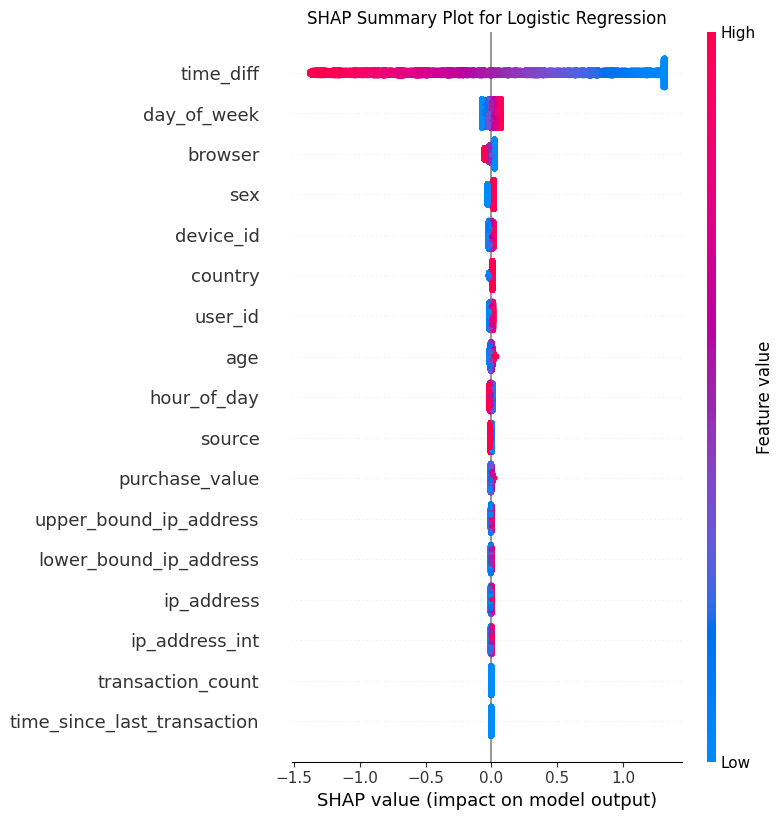

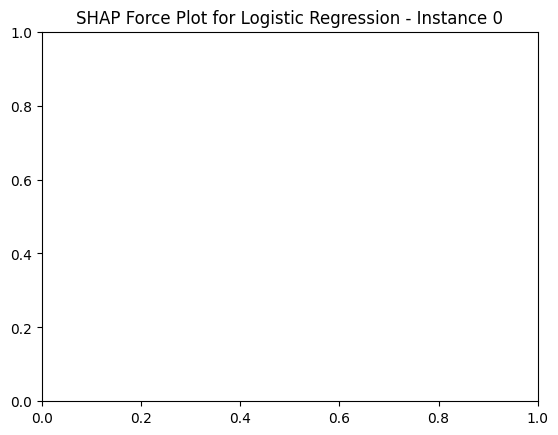

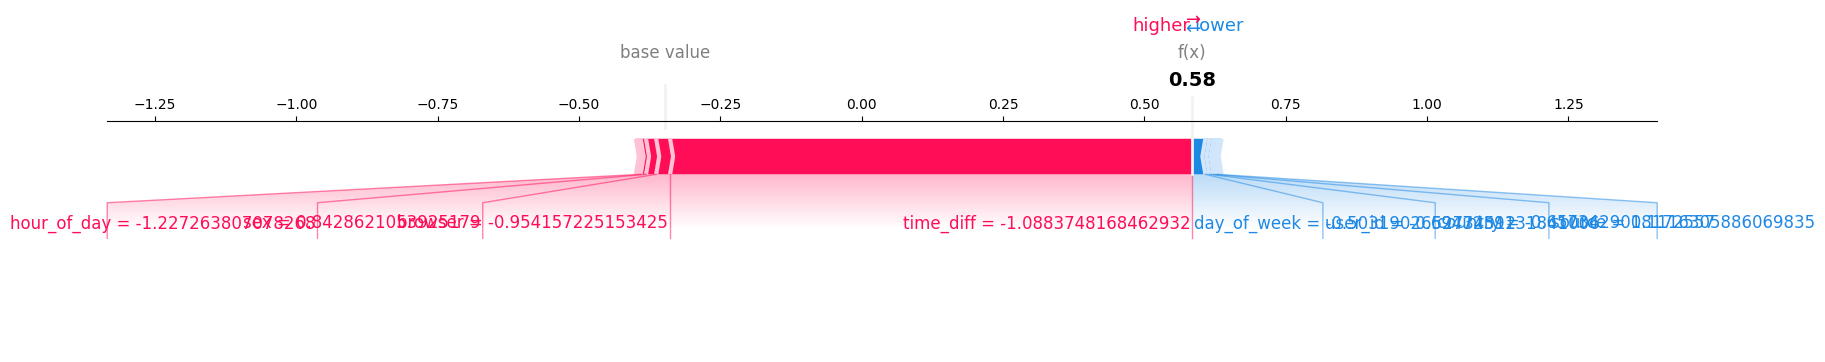

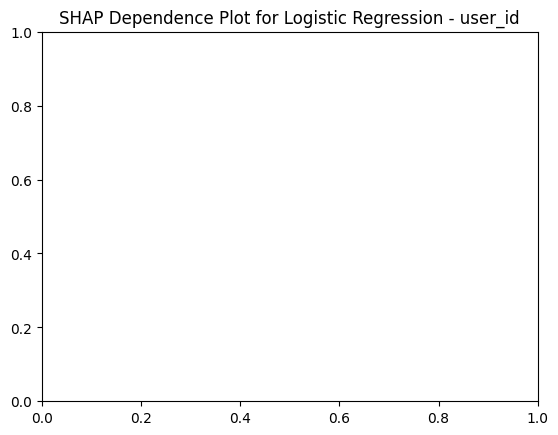

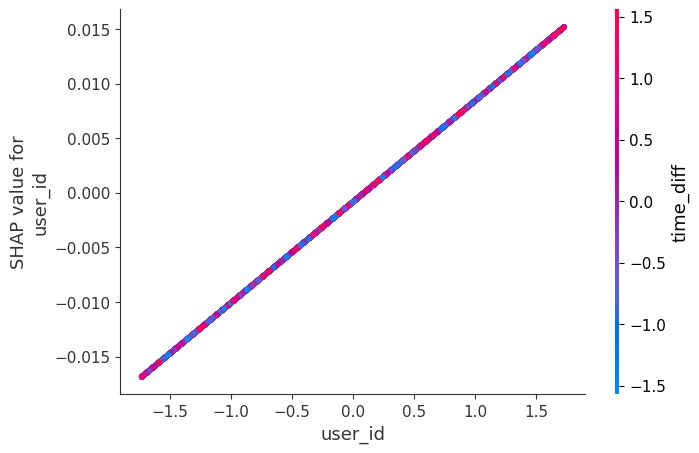

c:\Users\Naim\Fraud-Detection\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


LIME Explanation for Logistic Regression - Instance 0


In [27]:
from sklearn.linear_model import LogisticRegression
from fraud_detection import create_shap_explanation, create_lime_explanation

# Assuming X_fraud_train_scaled and X_fraud_test_scaled have 17 columns matching feature_names
log_reg = LogisticRegression(max_iter=500, class_weight='balanced')

# Re-train logistic regression on 17 features explicitly
log_reg.fit(X_fraud_train_scaled, y_fraud_train)

# Ensure that the model is aligned with feature names in X_fraud_train_scaled
log_reg.feature_names_in_ = X_fraud_train_scaled.columns  # manually set if not present

# Run SHAP and LIME explanations
create_shap_explanation(log_reg, X_fraud_train_scaled, X_fraud_test_scaled, feature_names, "Logistic Regression")
create_lime_explanation(log_reg, X_fraud_train_scaled, X_fraud_test_scaled, feature_names, "Logistic Regression", instance_index=0)
